In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os
import sys
sys.path.append('../')

import platometer as pm

%matplotlib inline

# Running platometer on a single image in Jupyter

In [2]:
image_path = 'image_examples1/image_example1.JPG'
p = pm.run_platometer({'path': image_path, 'plate_format': np.array([32, 48])})

In [3]:
# Final output
p.colony_data.head()

,col_pxl,row_pxl,label,col,row,size
0,33,34,0,1,1,0.0
1,78,34,1,2,1,764.0
2,123,34,2,3,1,736.0
3,168,34,3,4,1,672.0
4,213,34,4,5,1,626.0


In [5]:
# Save the Platometer instance (with all intermediate steps) to pickle
p.save(verbose=True)

Saving to image_examples1/image_example1.JPG.p.


## Optional: Viewing and saving data at each step

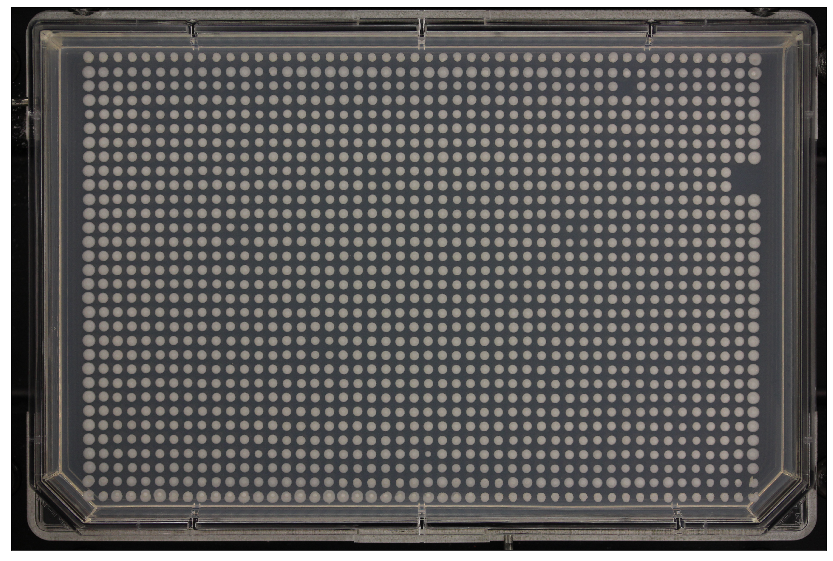

In [4]:
# Original image
fig, ax = plt.subplots(1, 1, figsize=(20,10))
ax = p.show_plate(show='image', ax=ax)

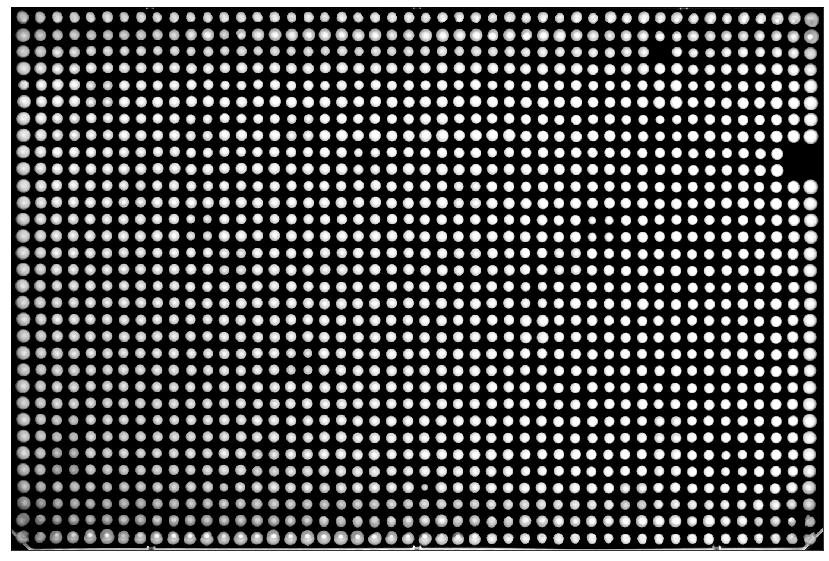

In [5]:
# Edge trimming 
edge_triming_data = p.im_gray_trimmed
fig, ax = plt.subplots(1, 1, figsize=(20,10))
ax = p.show_plate(ax=ax)

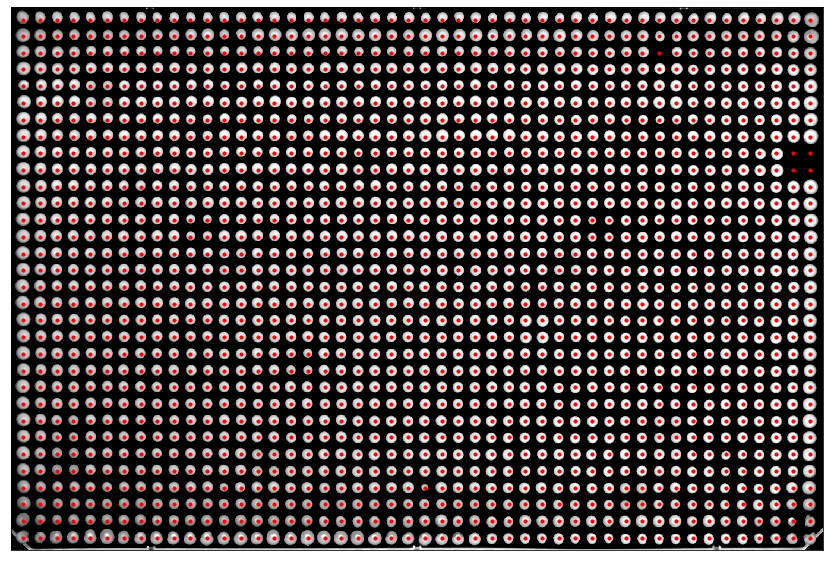

In [6]:
# Colony center detection
colony_pxl = pd.DataFrame(p.colony_pxl)
fig, ax = plt.subplots(1, 1, figsize=(20,10))
ax = p.show_plate(ax=ax)
ax.scatter(colony_pxl[1], colony_pxl[0], c='r', s=10)

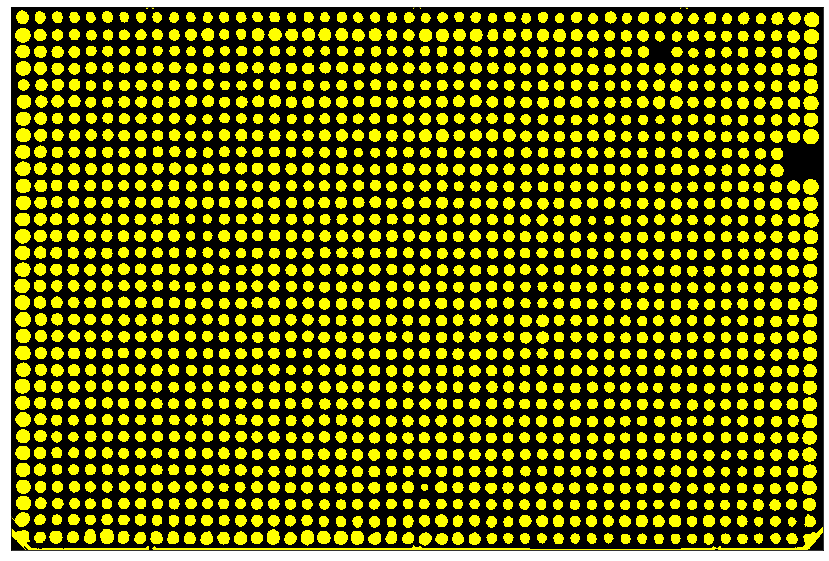

In [7]:
# Thresholding
foreground_data = p.im_foreground
fig, ax = plt.subplots(1, 1, figsize=(20,10))
ax = p.show_plate(show='im_foreground', ax=ax)

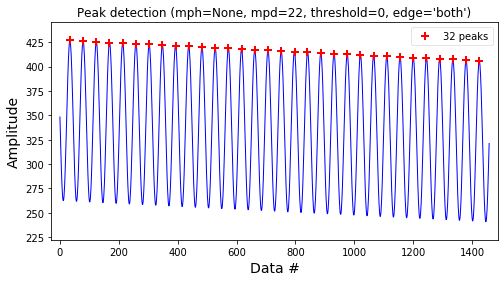

In [8]:
# Identifying colony centers by fitting a sinusoid curve and detecting peaks
colony_row_pxl = pm.detect_peaks(p.row_avg_fit, mpd=p.fit_row['period'] / 2, edge='both', kpsh=True, valley=False, show=True)

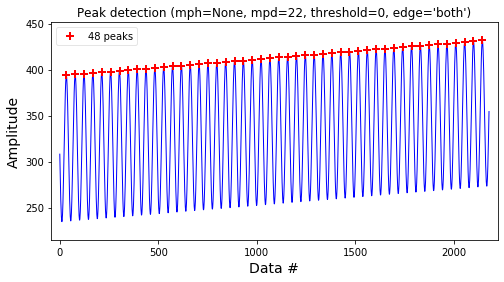

In [9]:
colony_col_pxl = pm.detect_peaks(p.col_avg_fit, mpd=p.fit_col['period'] / 2, edge='both', kpsh=True, valley=False, show=True)

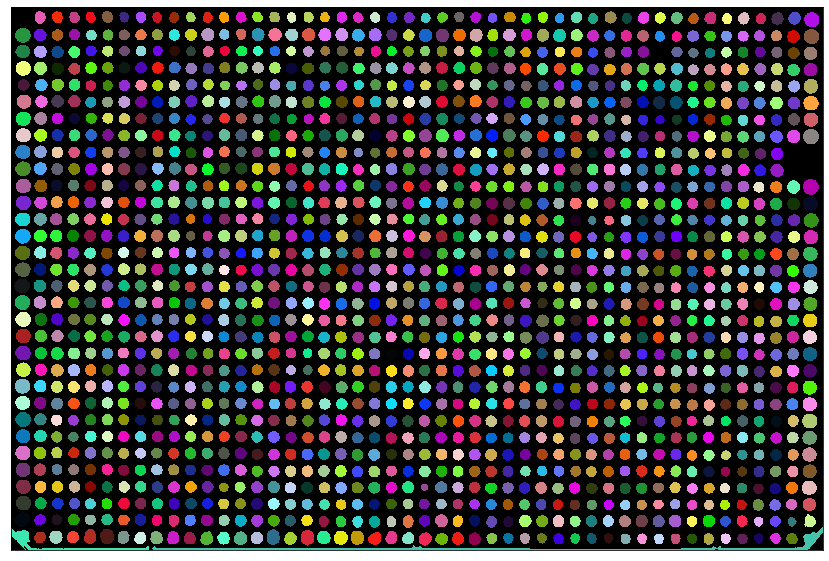

In [10]:
# Object detection
object_detection = p.im_objects
fig, ax = plt.subplots(1, 1, figsize=(20,10))
p.show_plate(show='im_objects', ax=ax)

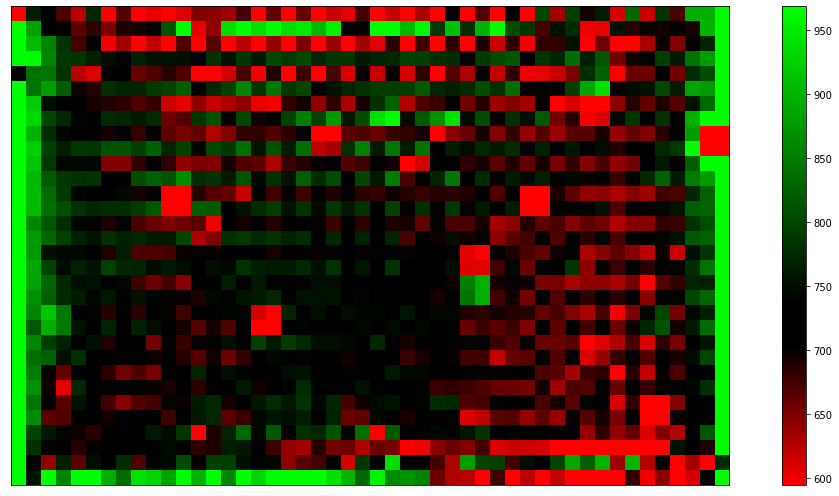

In [11]:
# Displaying final colony size
fig, ax = plt.subplots(1, 1, figsize=(15,7))
ax = p.show_plate(show='colony_data', ax=ax, colorbar=True)

# Running platometer on multiple images via command line

`python platometer.py examples/folders_to_process.txt`

In [19]:
# For each folder, Platometer generates a subfolder (platometer_<date>) with 2 files: 
# * all_data.txt: contains the processed data
# * jpg_map.txt: contains the list of processed files and their paths

In [16]:
# Replace this path with the path to the appropriate platometer_<date> folder
path_to_processed_data_folder = 'image_examples1/platometer_20201002'

In [17]:
data = pd.read_csv(os.path.join(path_to_processed_data_folder, 'all_data.txt'), sep='\t')
data.head()

,col_pxl,label,row_pxl,col,row,size,file_id
0,33,0,34,1,1,0.0,0
1,78,1,34,2,1,764.0,0
2,123,2,34,3,1,736.0,0
3,168,3,34,4,1,672.0,0
4,213,4,34,5,1,626.0,0


In [18]:
jpg = pd.read_csv(os.path.join(path_to_processed_data_folder, 'jpg_map.txt'), sep='\t')
jpg.head()

,file_id,path
0,0,examples/image_examples1/image_example1.JPG
1,1,examples/image_examples1/image_example3.JPG
2,2,examples/image_examples1/image_example2.JPG


In [19]:
all_data = data.merge(jpg, on='file_id')
all_data.head()

,col_pxl,label,row_pxl,col,row,size,file_id,path
0,33,0,34,1,1,0.0,0,examples/image_examples1/image_example1.JPG
1,78,1,34,2,1,764.0,0,examples/image_examples1/image_example1.JPG
2,123,2,34,3,1,736.0,0,examples/image_examples1/image_example1.JPG
3,168,3,34,4,1,672.0,0,examples/image_examples1/image_example1.JPG
4,213,4,34,5,1,626.0,0,examples/image_examples1/image_example1.JPG
